# Titanic EDA and Visualization

When she was launched, the RMS Titanic was largest moving object ever built – 269 metres long and weighing 46,000 tons. One of three Olympic class ocean liners operated by the White Star Line, she was built between 1909–11 by the Harland and Wolff shipyard in Belfast. On 10 April 1912, the Titanic departed on its maiden voyage from Southampton to New York.

On 14 April 1912, despite warnings of ice fields, the ship did not reduce speed and struck an iceberg shortly before midnight. The iceberg ripped a long gash in the side and the ship began to flood. Passengers were unaware and joked about the ice found on the deck. The Captain ordered the lifeboats to be filled and lowered, with women and children first. More than two hours after hitting the iceberg, Titanic sank into the Atlantic Ocean.

- Source https://libguides.ncl.ac.uk/titanic

In [1]:
#importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading data from csv file
df = pd.read_csv('data/train.csv')

In [3]:
# let's have a look at the data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

Dataset consists of 12 columns and 891 rows.

In [5]:
# desc. stat.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now let's focus on dealing with dirty data


In [6]:
# checking where missings exist
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
# checking the amount of missing values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I decided to get rid of Name since I wouldn't need it in my analysis.
Moreover, Cabin and Ticket also don't include any useful pieces of information.

In [8]:
# dropping columns
df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
# filling missing age with median 
df['Age'].fillna(df.Age.median(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
# making sure data is cleaned
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

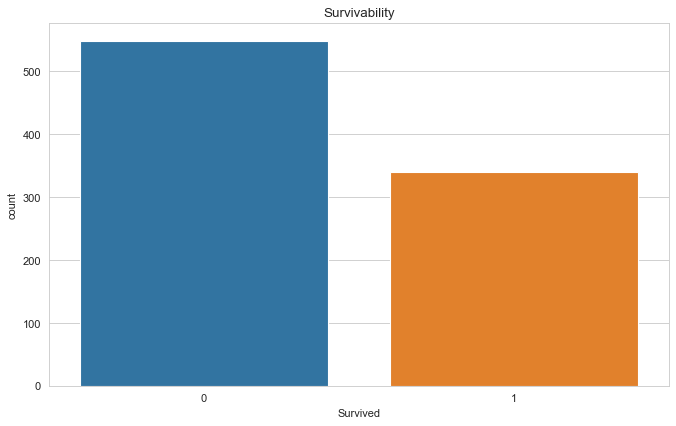

In [13]:
plt.figure(figsize=(10, 6), dpi=80)
sns.set_style("whitegrid")
sns.countplot(data=df, x='Survived')
plt.title("Survivability")
plt.show()

In [14]:
df.Survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

We can clearly see that about 61% of passengers didn't manage to survive Titanic's sinking. That's mean over 500 people have died.

Let's make some visualization now and investigate them.

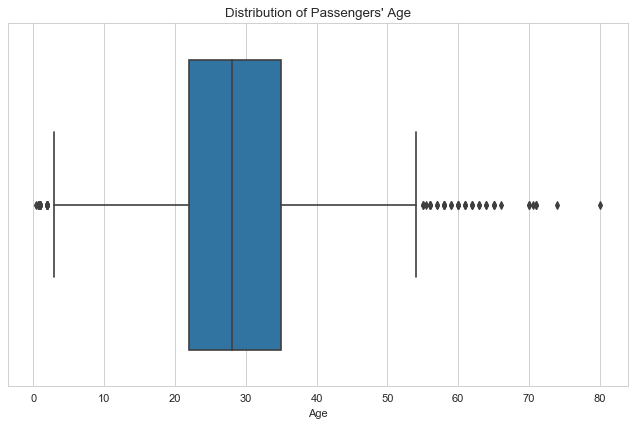

In [16]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(data=df, x='Age')
plt.title("Distribution of Passengers' Age")
plt.show()

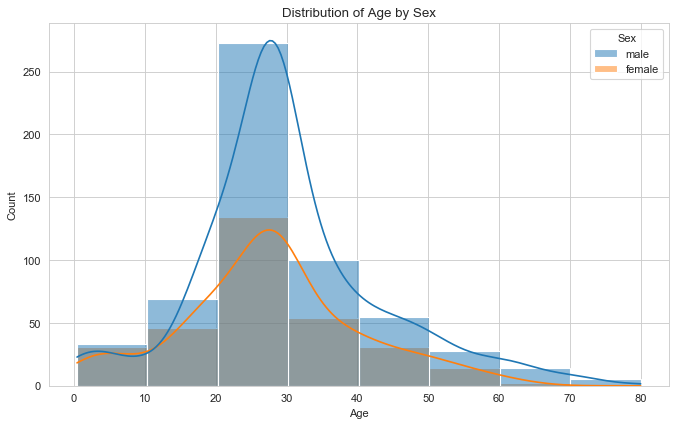

In [26]:
plt.figure(figsize=(10, 6), dpi=80)
sns.histplot(data=df, x='Age', hue='Sex', kde=True, bins=8)
plt.title("Distribution of Age by Sex")
plt.show()

Most passengers were between 20 and 30 years old.

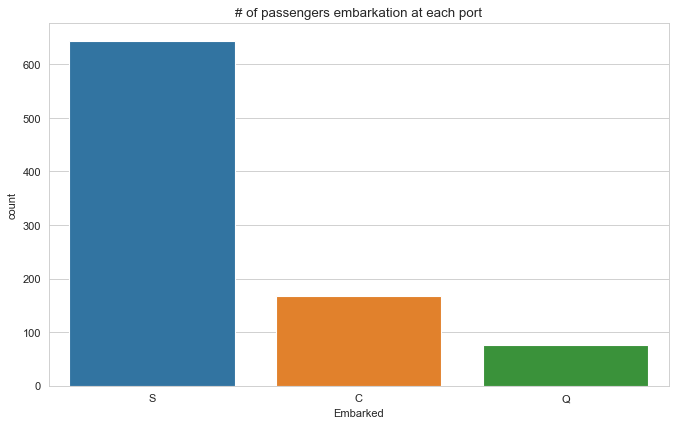

In [31]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x="Embarked")
plt.title("# of passengers embarkation at each port")
plt.show()

Over 600 passengers have embarkled at Southampton port and the least popular was Queenstown port.

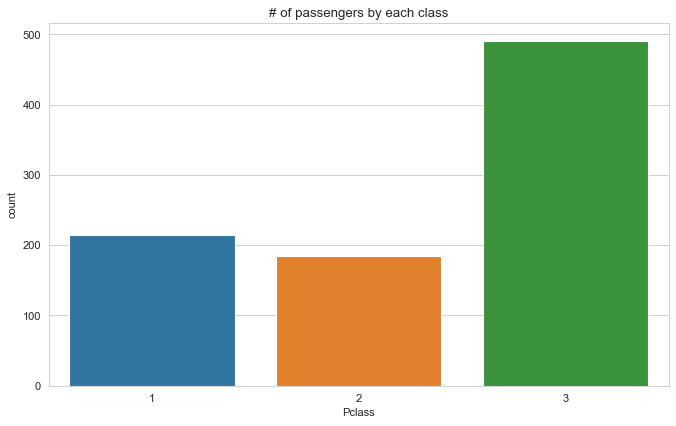

In [36]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x="Pclass")
plt.title("# of passengers by each class")
plt.show()

There were more 3rd class passengers than 1st and 2nd one combined.

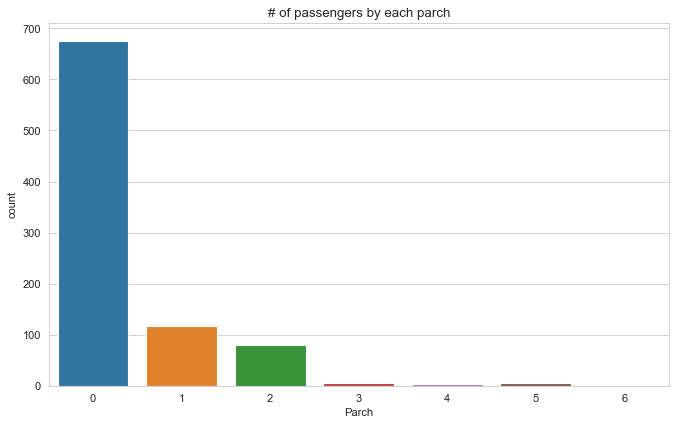

In [41]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x='Parch')
plt.title("# of passengers by each parch")
plt.show()

There were very few families on board, and if there were, they had a maximum of two children.

Since now I will try to check if there are any factors that had influence of survivability rate.

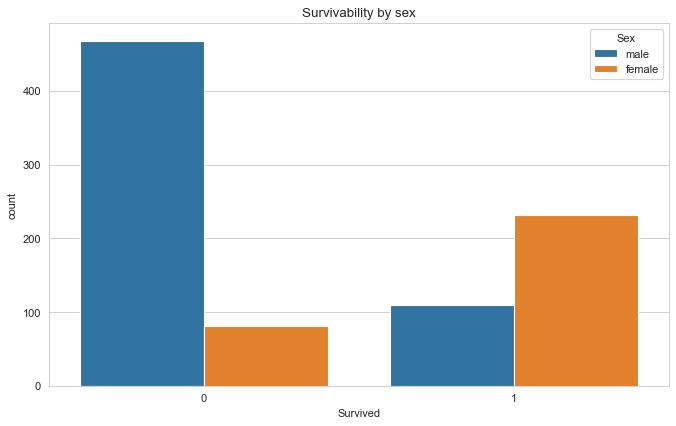

In [15]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survivability by sex")
plt.show()

The data suggests that women were more likely to survive. 

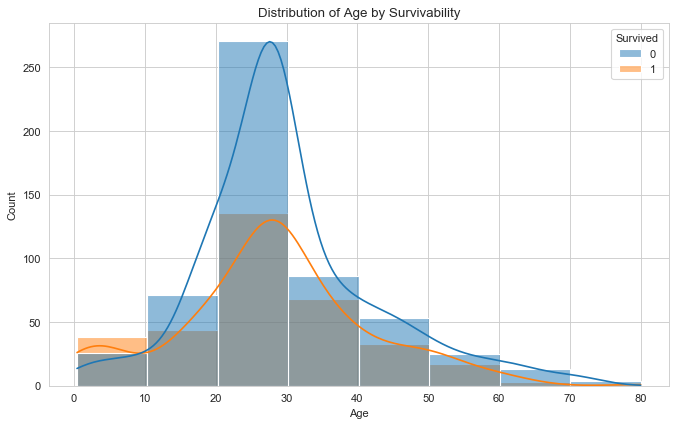

In [44]:
plt.figure(figsize=(10, 6), dpi=80)
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=8)
plt.title("Distribution of Age by Survivability")
plt.show()

This is quite interesting because only children under 10 outperformed the mortality in their group.

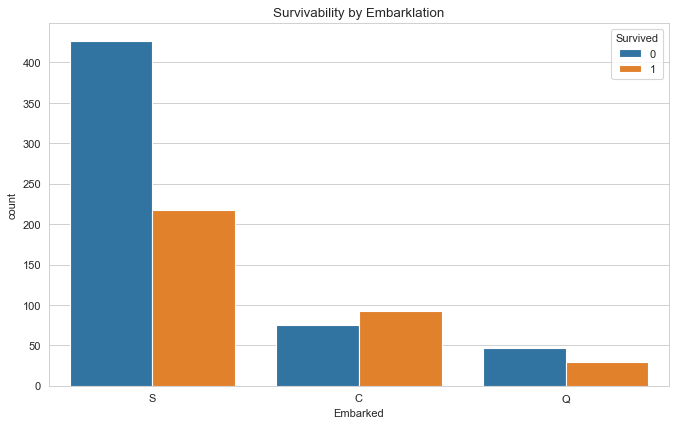

In [48]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survivability by Embarklation')
plt.show()

Passengers who embarked at Cherbourg's Port had more chance to survive.

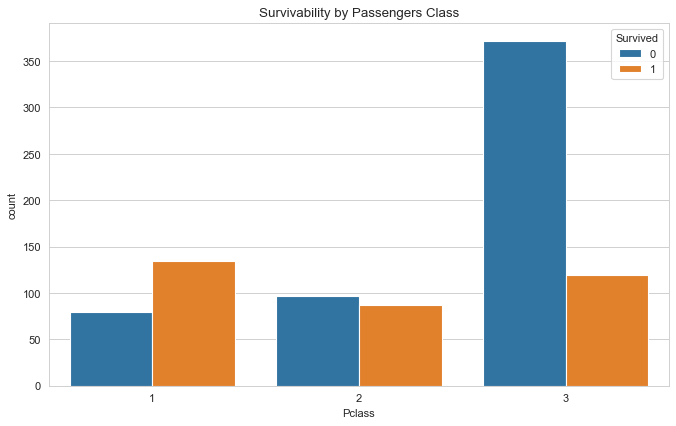

In [51]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survivability by Passengers Class')
plt.show()

Unfortunately, if you were a 3rd class passenger you would be more likely to die. On the other hand, the luckiest were a 1st class passengers.

# Summary

Due to my investigation of the Titanic dataset I can assume that there were few factors that influence of survivability rate.

Factors that increased the chances of survival:
    - Sex (female)
    - Pclass (1st)
    - Embarked (Cherbourg's Port)
    - Age (between 0-10 years old)
    
The most negative factors are:
    - Sex (male)
    - Pclass (3rd)
    - Embarked (Southampton)